# 1-D Linear Regression 
With practical example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = [] 
Y = [] # Two empty aarays
for line in open("data/data_1d.csv"):
    x, y = line.split(',')
    X.append(float(x))
    Y.append(float(y))

In [3]:
# let's turm to X and Y into numpy array
X = np.array(X)
Y = np.array(Y)

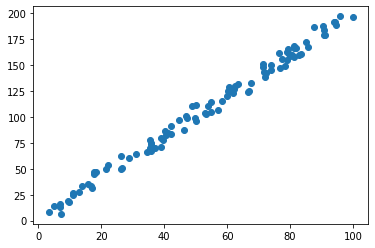

In [4]:
#Plot to see what is looks like
plt.scatter(X, Y)
plt.show()

In [5]:
#from IPython.display import Image

![](image/linear.jpg)
![](image/linear_2.jpg)

In [6]:
# apply the equations we learned to calculate a and b

# denominator is common
# note: this could be more efficient if
#       we only computed the sums and means once

denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

In [7]:
# let's calculate the predicted Y
Yhat = a*X + b

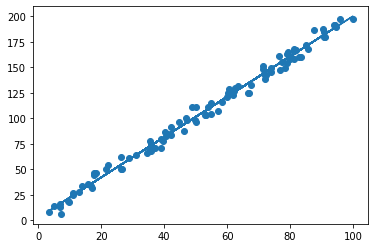

In [8]:
# let's plot everything together to make sure it worked
plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()


![title](image/R2.jpg)

In [9]:
# determine how good the model is by computing the r-squared
# R-Square = 1 - SS_residual / SS_total

d1 = Y - Yhat # the difference is still the vector
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)

the r-squared is: 0.9911838202977805


## Moore's Law

shows how linear regression analysis can be applied to moore's law

notes for this course can be found at transistor count from: https://en.wikipedia.org/wiki/Transistor_count

In [10]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future
import re

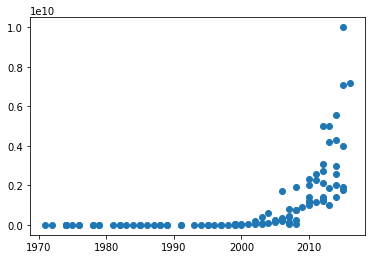

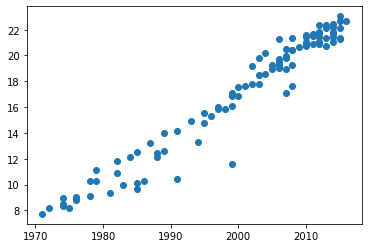

In [11]:
X = []
Y = []

# some numbers show up as 1,170,000,000 (commas)
# some numbers have references in square brackets after them

non_decimal = re.compile(r'[^\d]+')

for line in open('moore.csv'):
    r = line.split('\t')

    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)


X = np.array(X)
Y = np.array(Y)

plt.scatter(X, Y)
plt.show()

Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

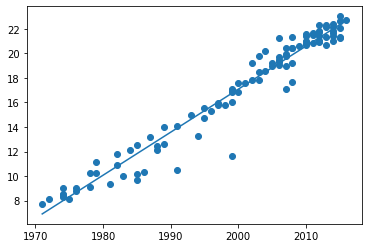

In [12]:
# copied from from above equation
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

# let's calculate the predicted Y
Yhat = a*X + b

plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

In [13]:
# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("a:", a, "b:", b)
print("the r-squared is:", r2)

# how long does it take to double?
# log(transistorcount) = a*year + b
# transistorcount = exp(b) * exp(a*year)
# 2*transistorcount = 2 * exp(b) * exp(a*year) = exp(ln(2)) * exp(b) * exp(a * year) = exp(b) * exp(a * year + ln(2))
# a*year2 = a*year1 + ln2
# year2 = year1 + ln2/a
print("time to double:", np.log(2)/a, "years")

a: 0.3510435733650199 b: -685.000284381709
the r-squared is: 0.952944285228576
time to double: 1.9745331723797188 years


# Multiple Linear regression

- For simple linear regression we have:

     * {(x1, y1), (x2, y2), ... (xN, yN)}
 
- we still have this but now xi is a vector(contains multiple Number) and called feature vector X, not a scalar.
- Dimensionality == size of X, represented by the letter D
- Means w is also of size D
- our model: ![](image/mr.png)
- It is the dot product of wT and x

### Baic Term
- we can always absorb b into w by appending a 1 to the feature vector x
- Rename b to w0, append x0 which is always 1
- 

- Is equivalent to adding a column of 1s to our data matrix X(originally od size NxD)
 

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

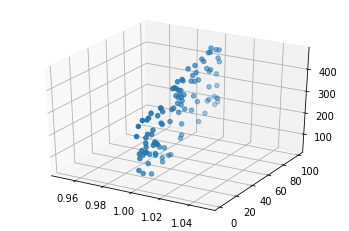

In [15]:
X = []
Y = []

for line in open('data_2d.csv'):
    x1, x2, y = line.split(',')
    X.append([1, float(x1), float(x2)])
    Y.append(float(y))
    
# turn x and y into numpy arrays
X = np.array(X)
Y = np.array(Y)

#Lets plot the dasta to see what the data looks like 
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:, 1], Y)
plt.show()

In [16]:
# Calculate Weights
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
yhat = np.dot(X, w)

In [17]:
d1 = Y-yhat
d2 = Y-Y.mean()
r2 = 1 - d1.dot(d1)/d2.dot(d2)
print("r-square; ",  r2)

r-square;  0.9980040612475778


# Polynomoial Function

In [18]:
from __future__ import print_function, division
from builtins import range

In [19]:
# load the data
X = []
Y = []
for line in open('data_poly.csv'):
    x, y = line.split(',')
    x = float(x)
    X.append([1, x, x*x]) # add the bias term x0 = 1
    # our model is therefore y_hat = w0 + w1 * x + w2 * x**2
    Y.append(float(y))

# let's turn X and Y into numpy arrays since that will be useful later
X = np.array(X)
Y = np.array(Y)

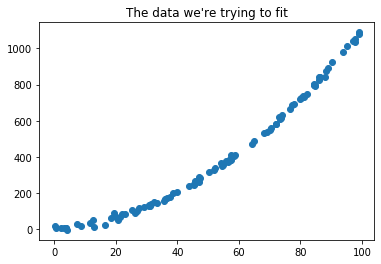

In [20]:
# let's plot the data to see what it looks like
plt.scatter(X[:,1], Y)
plt.title("The data we're trying to fit")
plt.show()

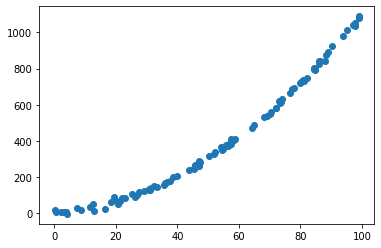

In [21]:
# apply the equations we learned to calculate a and b
# numpy has a special method for solving Ax = b
# so we don't use x = inv(A)*b
# note: the * operator does element-by-element multiplication in numpy
#       np.dot() does what we expect for matrix multiplication
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))


# let's plot everything together to make sure it worked
plt.scatter(X[:,1], Y)

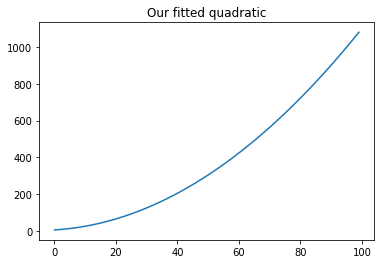

In [22]:
# to plot our quadratic model predictions, let's
# create a line of x's and calculate the predicted y's
x_line = np.linspace(X[:,1].min(), X[:,1].max())
y_line = w[0] + w[1] * x_line + w[2] * x_line * x_line
plt.plot(x_line, y_line)
plt.title("Our fitted quadratic")
plt.show()

In [23]:
# determine how good the model is by computing the r-squared
Yhat = X.dot(w)
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)

the r-squared is: 0.9991412296366858


# Practical Example of  Multiple Regression

* need to sudo pip install xlrd to use pd.read_excel

* Note: you may need to update your version of future
        - sudo pip install -U future

* data is from: http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/mlr02.html

- The data (X1, X2, X3) are for each patient.
    - X1 = systolic blood pressure
    - X2 = age in years
    - X3 = weight in pounds

In [ ]:
from __future__ import print_function, division
from builtins import range

In [31]:
df = pd.read_excel('data/mlr02.xls')
X = df.values

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [36]:
df.head()

,X1,X2,X3,ones
0,132,52,173,1
1,143,59,184,1
2,153,67,194,1
3,162,73,211,1
4,154,64,196,1


In [37]:
X

,X2,X3,ones
0,52,173,1
1,59,184,1
2,67,194,1
3,73,211,1
4,64,196,1
5,74,220,1
6,54,188,1
7,61,188,1
8,65,207,1
9,46,167,1


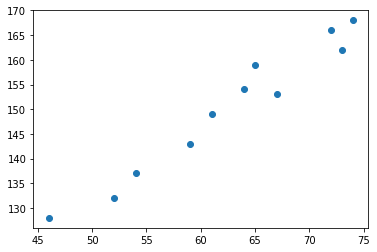

In [32]:
# using age to predict systolic blood pressure
plt.scatter(X[:,1], X[:,0])
plt.show()
# looks pretty linear!

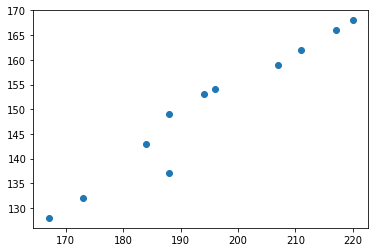

In [33]:
# using weight to predict systolic blood pressure
plt.scatter(X[:,2], X[:,0])
plt.show()
# looks pretty linear!

In [34]:
df['ones'] = 1
Y = df['X1']
X = df[['X2', 'X3', 'ones']]
X2only = df[['X2', 'ones']]
X3only = df[['X3', 'ones']]

In [35]:
def get_r2(X, Y):
    w = np.linalg.solve( X.T.dot(X), X.T.dot(Y) )
    Yhat = X.dot(w)

    # determine how good the model is by computing the r-squared
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

print("r2 for x2 only:", get_r2(X2only, Y))
print("r2 for x3 only:", get_r2(X3only, Y))
print("r2 for both:", get_r2(X, Y))

r2 for x2 only: 0.9578407208147355
r2 for x3 only: 0.9419952085293065
r2 for both: 0.9768471041502091
